<a href="https://colab.research.google.com/github/philippamensah11/fictional-dollop/blob/main/Machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#My project

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [4]:
df= pd.read_csv("/content/gdrive/MyDrive/Data science/Machine learning project/Obesity_Data.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#Univariate analysis


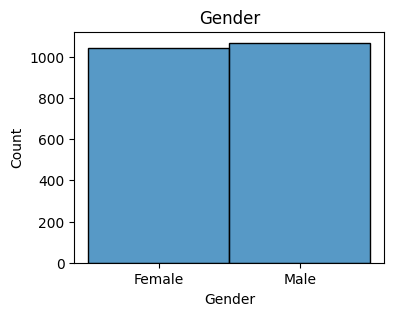

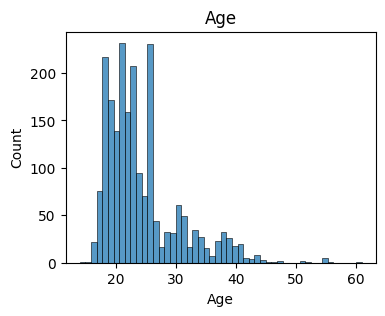

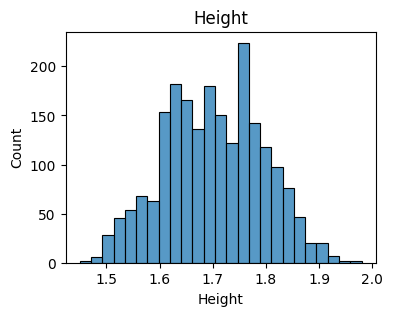

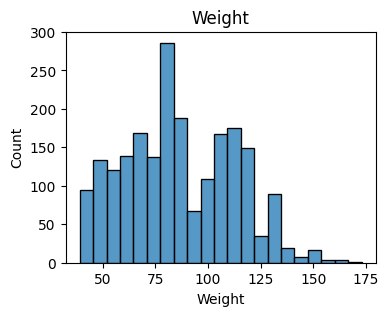

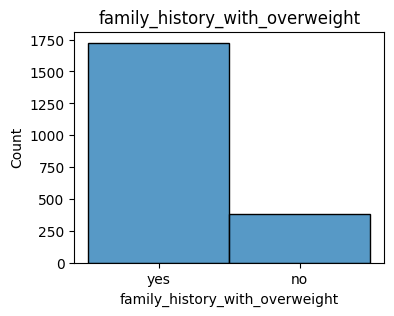

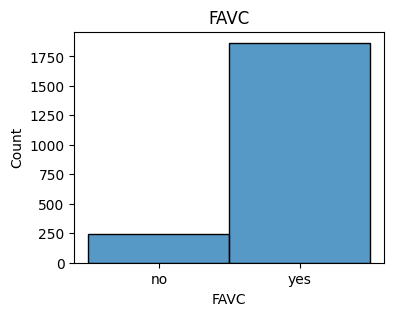

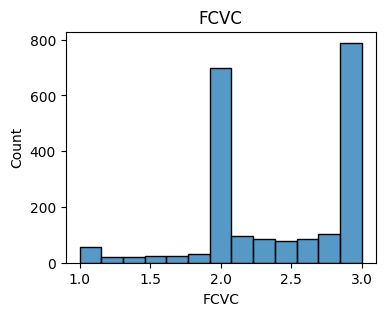

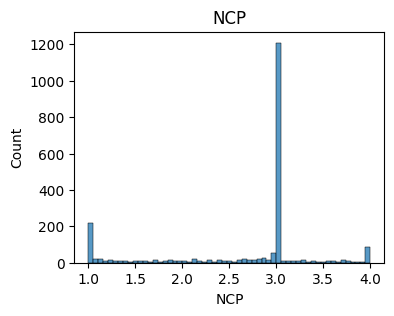

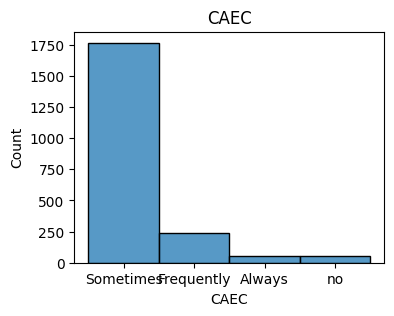

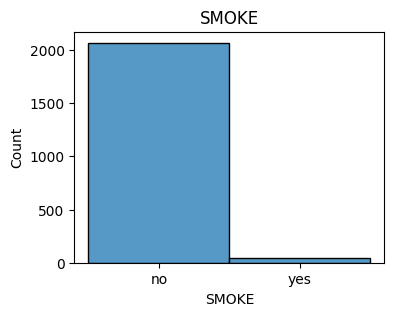

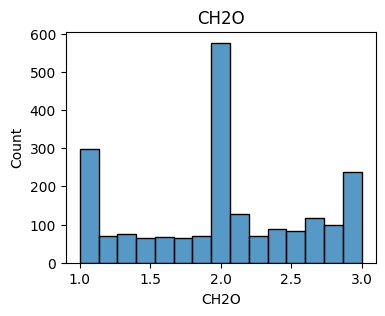

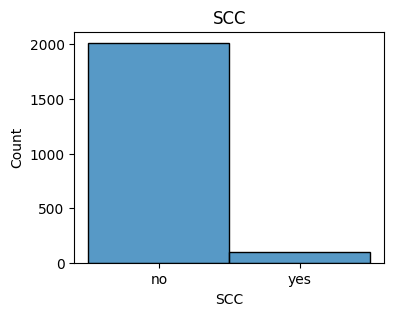

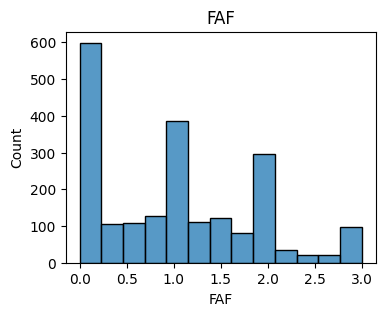

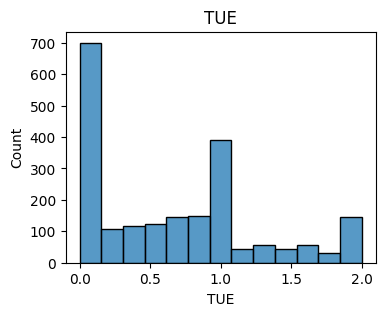

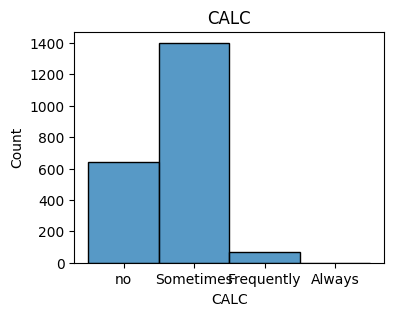

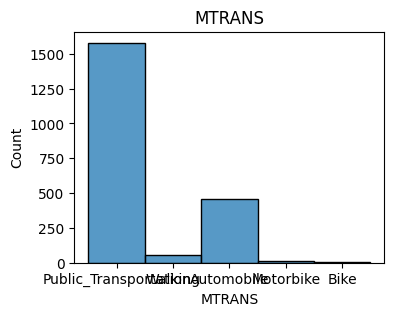

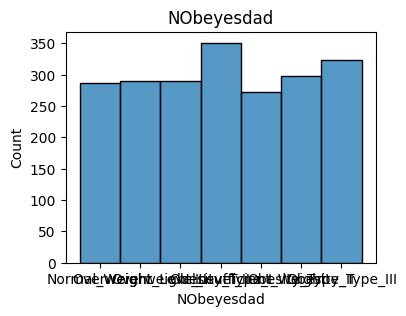

In [5]:
for feature in df.columns:
  plt.figure(figsize= (4,3))
  sns.histplot(data=df, x=feature)
  plt.title(feature)
  plt.show()

+ SCC- Binary- might not use as it is highly imbalanced
+  CH2O- Semi uniform column
+ SMOKE- Binary- may not use as highly imbalanced
+ CAEC- 4 classes, highly imbalanced, dimension reduction
+ NCP- Semi- normal distribution- can be chopped into pieces, when NCP= 1, is is 1 or it is 0. Event is either happening or not happening.
+ FCVC- Uniform distribution
+ FAVC- Binary
+ Family history- Binary
+ Height- Normal distribution
+ Weight- Normal distribution
+ Age- Semi- normal with long right tail- outlier treatments.
+ Gender- Binary- equally balanced.

**Observation**

+ NObeyesdad- 7 classes approximately equally balanced
HW- Exponential distribution, normal distribution and balance between classes

+ MTRANS- 5 classes which are highly imbalanced- dimension reduction
Create 3 columns instead of 5. Will generalise more data however, it makes a better future prediction.

+ CALC- 4 classes, hghly imbalanced, dimension reduction

+ TUE- Semi- uniform distribution

+ FAF- Semi- uniform distribution






Exponential distrubution models the time lapse between events
Normal distribution- Data is in a bell shape and is equal on both sides
Class balance- the relative frequency between 2 classes

# Preprocessing


## Outlier treatment

<Axes: ylabel='Frequency'>

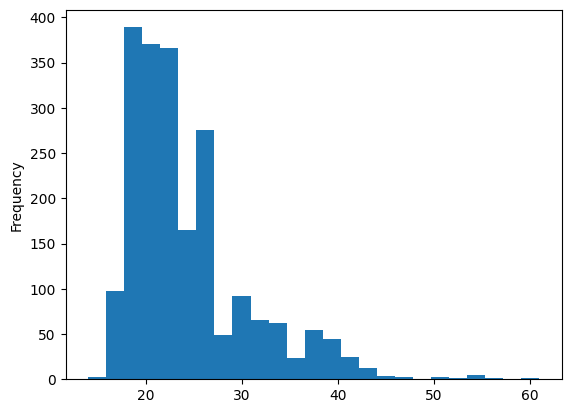

In [6]:
df["Age"].plot.hist(bins=25)


<Axes: ylabel='Frequency'>

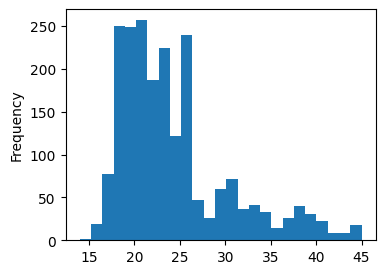

In [7]:
df["Age"]= df["Age"].clip(lower=13, upper=45)
df["Age"].plot.hist(bins=25, figsize= (4,3))

##Dimension reduction
MTRANS,
CAEC,
CALC,
NOEBeyesdad

##MTRANS DIMENSION REDUCTION

In [8]:
df["MTRANS"].value_counts()

,count
MTRANS,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


<Axes: xlabel='MTRANS'>

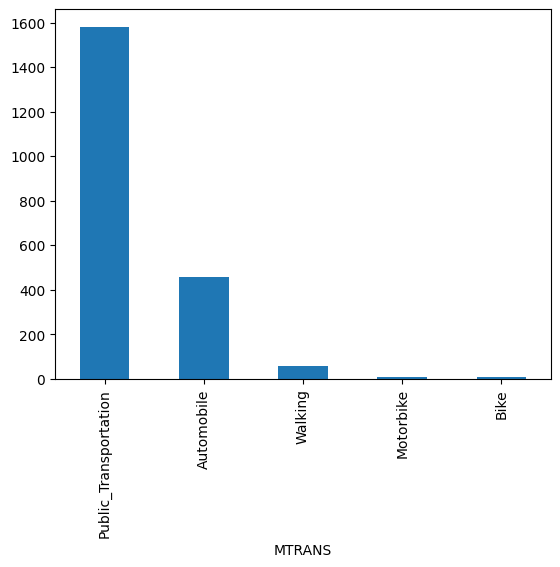

In [9]:
df["MTRANS"].value_counts().plot.bar()


Motorbike and automobile together
Walking and bike into public transportation

In [10]:
df["MTRANS"].value_counts().index

Index(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'], dtype='object', name='MTRANS')

In [11]:
df["MTRANS"]= df["MTRANS"].replace({"Bike":"Public_Transportation", "Walking": "Public_Transportation",
                                    "Motorbike": "Automobile"})

<Axes: xlabel='MTRANS'>

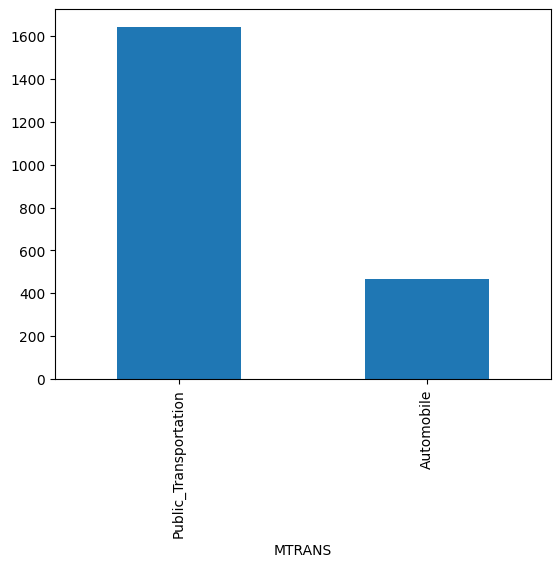

In [12]:
df["MTRANS"].value_counts().plot.bar()

##CAEC DIMENSION REDUCTION

In [13]:
df["CAEC"].value_counts().index

Index(['Sometimes', 'Frequently', 'Always', 'no'], dtype='object', name='CAEC')

<Axes: xlabel='CAEC'>

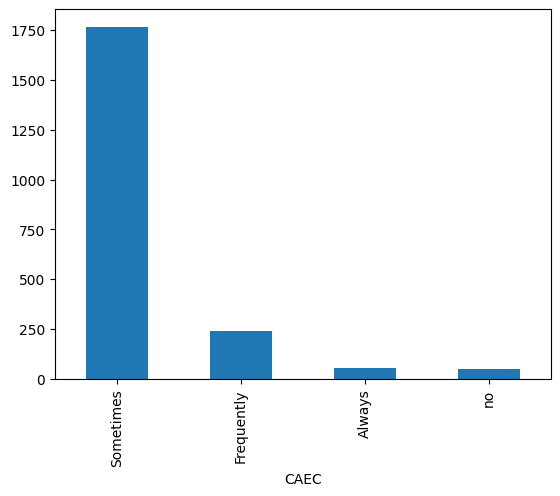

In [14]:
df["CAEC"].value_counts().plot.bar()

In [15]:
df["CAEC"]= df["CAEC"].replace({"Always":"No", "no": "No", "Frequently":"Yes", "Sometimes": "Yes"})

<Axes: xlabel='CAEC'>

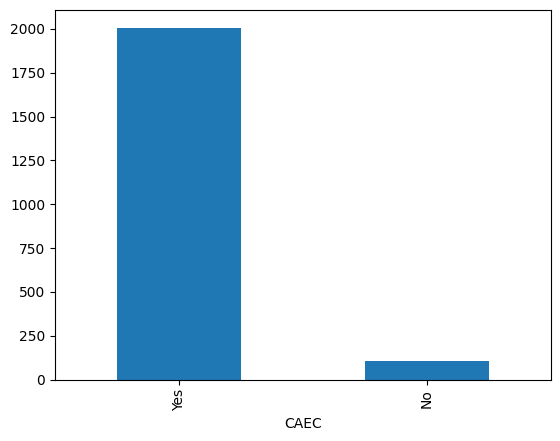

In [16]:
df["CAEC"].value_counts().plot.bar()

##CALC DIMENSION REDUCTION

In [17]:
df["CALC"].value_counts().index

Index(['Sometimes', 'no', 'Frequently', 'Always'], dtype='object', name='CALC')

In [18]:
df["CALC"]= df["CALC"].replace({"Always":"No", "no": "No", "Frequently":"Yes", "Sometimes": "Yes"})

<Axes: xlabel='CALC'>

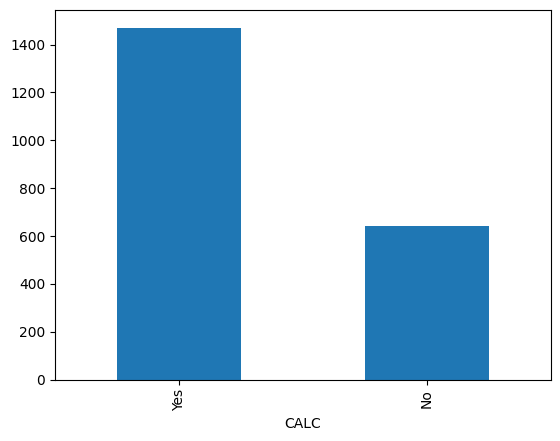

In [19]:
df["CALC"].value_counts().plot.bar()

##NOBEYESDAD REDUCTION

In [20]:
df["NObeyesdad"].value_counts().index

Index(['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II',
       'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight',
       'Insufficient_Weight'],
      dtype='object', name='NObeyesdad')

<Axes: xlabel='NObeyesdad'>

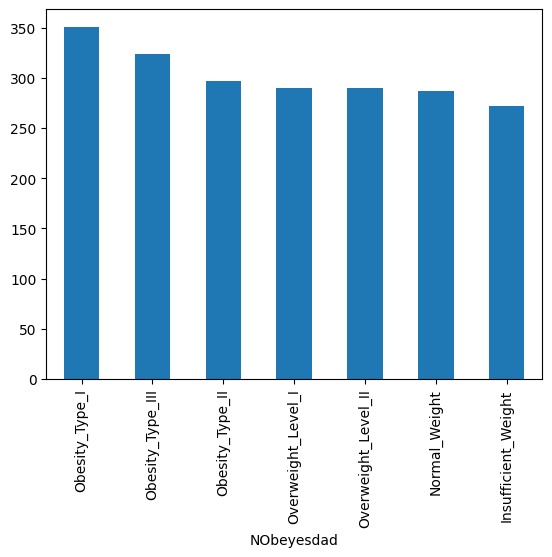

In [21]:
df["NObeyesdad"].value_counts().plot.bar()

In [22]:
df["NObeyesdad"]= df["NObeyesdad"].replace({"Insufficient_Weight": "Underweight",
                                            "Normal_Weight": "Normal",
                                            "Overweight_Level_I":"Overweight",
                                            "Overweight_Level_II": "Overweight",
                                            "Obesity_Type_I": "Obesity",
                                            "Obesity_Type_II": "Obesity",
                                            "Obesity_Type_III": "Obesity"})

<Axes: xlabel='NObeyesdad'>

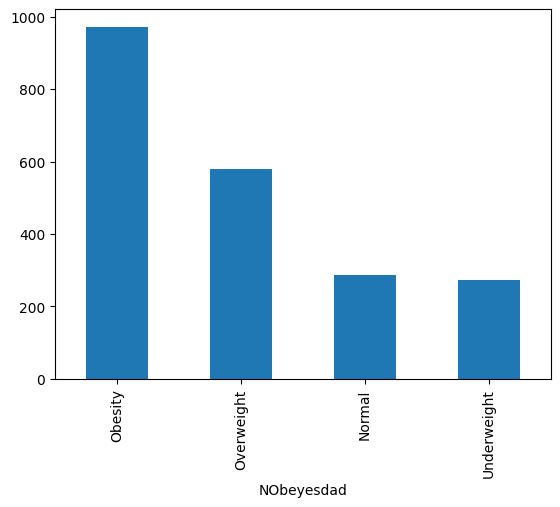

In [23]:
df["NObeyesdad"].value_counts().plot.bar()

In [24]:
df["NObeyesdad"].value_counts()

,count
NObeyesdad,
Obesity,972
Overweight,580
Normal,287
Underweight,272


##Checking for null values

In [25]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


##One hot encoding

In [26]:
cat_features= ['Gender', 'family_history_with_overweight',
       'FAVC', 'CAEC', 'SMOKE', 'SCC',
       'CALC', 'MTRANS'] #Remove any classes which do not have numbers

In [27]:
df= pd.get_dummies(df,columns=cat_features)
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,CAEC_No,CAEC_Yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_No,CALC_Yes,MTRANS_Automobile,MTRANS_Public_Transportation
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal,True,...,False,True,True,False,True,False,True,False,False,True
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal,True,...,False,True,False,True,False,True,False,True,False,True
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal,False,...,False,True,True,False,True,False,False,True,False,True
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight,False,...,False,True,True,False,True,False,False,True,False,True
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight,False,...,False,True,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity,True,...,False,True,True,False,True,False,False,True,False,True
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity,True,...,False,True,True,False,True,False,False,True,False,True
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity,True,...,False,True,True,False,True,False,False,True,False,True
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity,True,...,False,True,True,False,True,False,False,True,False,True


#Modelling

##Features, Target

In [28]:
df.columns


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_No',
       'CAEC_Yes', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_No',
       'CALC_Yes', 'MTRANS_Automobile', 'MTRANS_Public_Transportation'],
      dtype='object')

In [29]:
features=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
        'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_No',
       'CAEC_Yes', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_No',
       'CALC_Yes', 'MTRANS_Automobile', 'MTRANS_Public_Transportation']

target= ['NObeyesdad']

###Def Confusion Classification Report

In [30]:
def confusion_classification_report (model, model_name, test_score):

  y_pred= model.predict(X_test)

  cf_matrix = confusion_matrix(y_test, y_pred)


  class_labels = ['Obesity', 'Overweight', 'Normal', 'Underweight']

  plt.figure(figsize=(5, 4))
  sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='flare',
              xticklabels=class_labels, yticklabels=class_labels)

  plt.title(f'Confusion Matrix for {model_name} \n Test Accuracy: {round(test_score,2)}')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()
  print(classification_report(y_test, y_pred))


In [31]:
def confusion_classification_report (model, model_name, test_score):

  y_pred= model.predict(X_test)

  cf_matrix = confusion_matrix(y_test, y_pred)


  class_labels = ['Obesity', 'Overweight', 'Normal', 'Underweight']

  plt.figure(figsize=(5, 4))
  sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='flare',
              xticklabels=class_labels, yticklabels=class_labels)

  plt.title(f'Confusion Matrix for {model_name} \n Test Accuracy: {round(test_score,2)}')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()
  print(classification_report(y_test, y_pred))


In [32]:
def confusion_classification_report (model, model_name, test_score):

  y_pred= model.predict(X_test)

  cf_matrix = confusion_matrix(y_test, y_pred)


  class_labels = ['Obesity', 'Overweight', 'Normal', 'Underweight']

  plt.figure(figsize=(5, 4))
  sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='flare',
              xticklabels=class_labels, yticklabels=class_labels)

  plt.title(f'Confusion Matrix for {model_name} \n Test Accuracy: {round(test_score,2)}')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()
  print(classification_report(y_test, y_pred))


In [33]:
def confusion_classification_report (model, model_name, test_score):

  y_pred= model.predict(X_test)

  cf_matrix = confusion_matrix(y_test, y_pred)


  class_labels = ['Obesity', 'Overweight', 'Normal', 'Underweight']

  plt.figure(figsize=(5, 4))
  sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='flare',
              xticklabels=class_labels, yticklabels=class_labels)

  plt.title(f'Confusion Matrix for {model_name} \n Test Accuracy: {round(test_score,2)}')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()
  print(classification_report(y_test, y_pred))


## No Pre-processing experiments

In [34]:
X= df [features]
y= df[target]

In [35]:
list(y.value_counts().index)

[('Obesity',), ('Overweight',), ('Normal',), ('Underweight',)]

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .3, random_state=42)

In [37]:
X_train.shape

(1477, 24)

#

###Standardisation

In [38]:
scaler= StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

###K Neighbours Classifier (No pre-processing)



In [39]:
knn= BaggingClassifier(estimator= KNeighborsClassifier(n_neighbors= 4),n_estimators=50)
knn.fit(X_train, y_train)

#training 50 different classifiers

score_train_knn_no= knn.score(X_train, y_train)
score_test_knn_no= knn.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Def confusion_classification report







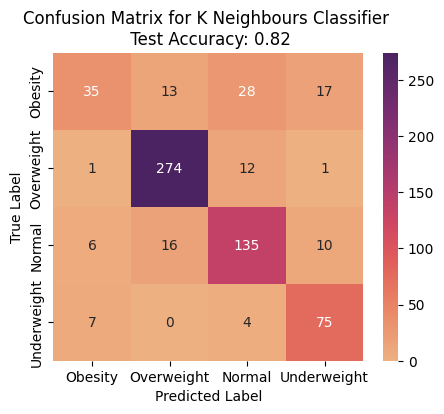

              precision    recall  f1-score   support

      Normal       0.71      0.38      0.49        93
     Obesity       0.90      0.95      0.93       288
  Overweight       0.75      0.81      0.78       167
 Underweight       0.73      0.87      0.79        86

    accuracy                           0.82       634
   macro avg       0.78      0.75      0.75       634
weighted avg       0.81      0.82      0.81       634



In [40]:
confusion_classification_report(knn, "K Neighbours Classifier", score_test_knn_no)

###Gradient boosting

In [41]:
gb= GradientBoostingClassifier().fit(X_train, y_train)
score_train_gb_no= gb.score(X_train, y_train)
score_test_gb_no= gb.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


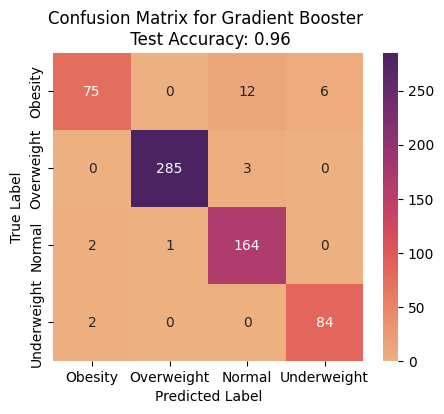

              precision    recall  f1-score   support

      Normal       0.95      0.81      0.87        93
     Obesity       1.00      0.99      0.99       288
  Overweight       0.92      0.98      0.95       167
 Underweight       0.93      0.98      0.95        86

    accuracy                           0.96       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.96      0.96      0.96       634



In [42]:
confusion_classification_report(gb, "Gradient Booster", score_test_gb_no)

###Logistic Regression

In [43]:
lg= LogisticRegression().fit(X_train, y_train)
score_train_lg_no= lg.score(X_train, y_train)
score_test_lg_no= lg.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


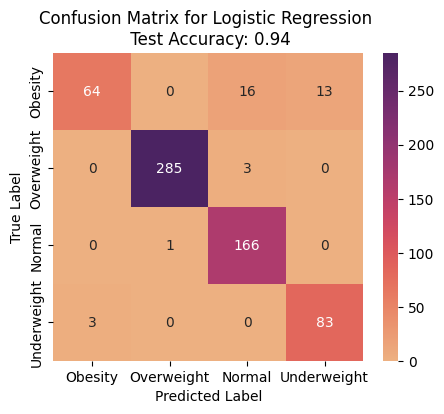

              precision    recall  f1-score   support

      Normal       0.96      0.69      0.80        93
     Obesity       1.00      0.99      0.99       288
  Overweight       0.90      0.99      0.94       167
 Underweight       0.86      0.97      0.91        86

    accuracy                           0.94       634
   macro avg       0.93      0.91      0.91       634
weighted avg       0.95      0.94      0.94       634



In [44]:
confusion_classification_report(lg, "Logistic Regression", score_test_lg_no)

###Extra trees classifier

###KNN

In [45]:
knn= BaggingClassifier(estimator= KNeighborsClassifier(n_neighbors= 4),n_estimators=50)
knn.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=4),
                  n_estimators=50)

In [46]:
score_train_knn_pca= knn.score(X_train, y_train)
score_test_knn_pca= knn.score(X_test, y_test)


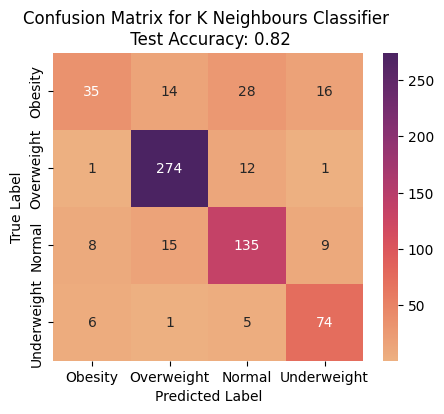

              precision    recall  f1-score   support

      Normal       0.70      0.38      0.49        93
     Obesity       0.90      0.95      0.93       288
  Overweight       0.75      0.81      0.78       167
 Underweight       0.74      0.86      0.80        86

    accuracy                           0.82       634
   macro avg       0.77      0.75      0.75       634
weighted avg       0.81      0.82      0.81       634



In [47]:
confusion_classification_report(knn, "K Neighbours Classifier", score_test_knn_pca)

In [48]:
et= ExtraTreesClassifier().fit(X_train, y_train)
score_train_et_no= et.score(X_train, y_train)
score_test_et_no= et.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


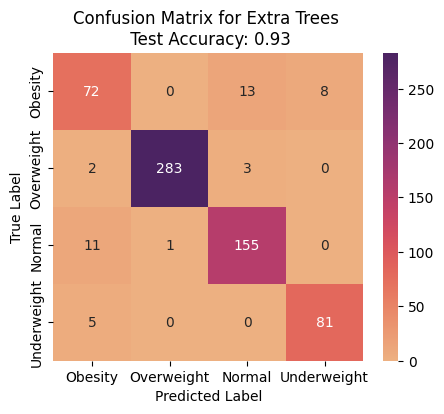

              precision    recall  f1-score   support

      Normal       0.80      0.77      0.79        93
     Obesity       1.00      0.98      0.99       288
  Overweight       0.91      0.93      0.92       167
 Underweight       0.91      0.94      0.93        86

    accuracy                           0.93       634
   macro avg       0.90      0.91      0.90       634
weighted avg       0.93      0.93      0.93       634



In [49]:
confusion_classification_report(et, "Extra Trees", score_test_et_no)



*   List item
*   List item



#Training

In [50]:
classes= df["NObeyesdad"].value_counts().index
classes

Index(['Obesity', 'Overweight', 'Normal', 'Underweight'], dtype='object', name='NObeyesdad')

In [51]:
[f"Pred_{c}"  for c in classes]

['Pred_Obesity', 'Pred_Overweight', 'Pred_Normal', 'Pred_Underweight']

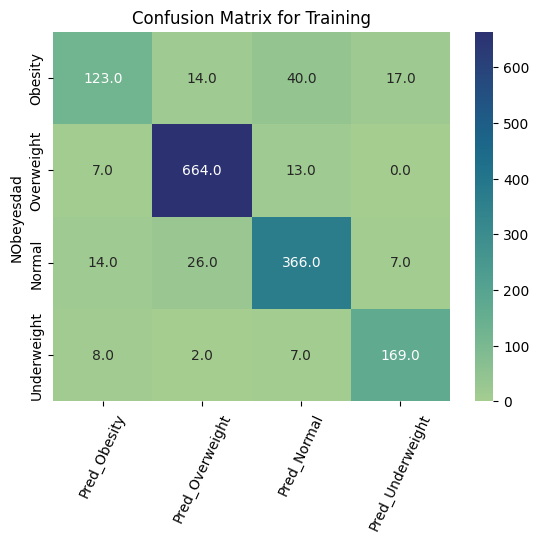

In [52]:
y_pred= knn.predict(X_train)
cm= confusion_matrix(y_train, y_pred)
cm= pd.DataFrame(cm, columns= [f"Pred_{c}"  for c in classes], index=classes)
sns.heatmap(cm,annot= True, cmap= "crest",fmt= ".1f")
plt.title("Confusion Matrix for Training")
plt.xticks(rotation= 65)
plt.show()


In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      Normal       0.81      0.63      0.71       194
     Obesity       0.94      0.97      0.96       684
  Overweight       0.86      0.89      0.87       413
 Underweight       0.88      0.91      0.89       186

    accuracy                           0.90      1477
   macro avg       0.87      0.85      0.86      1477
weighted avg       0.89      0.90      0.89      1477



#Make a list of classes

Text(0.5, 1.0, 'Confusion Matrix for Testing')

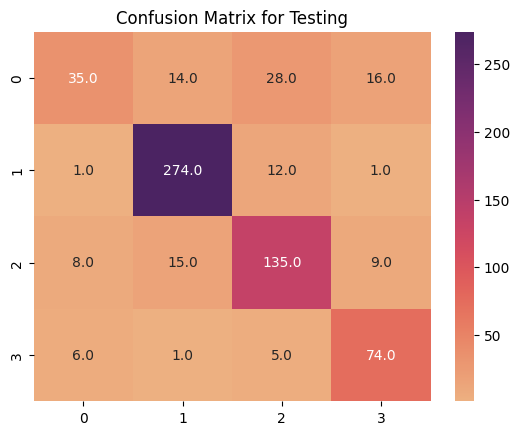

In [55]:
test_pred= knn.predict(X_test)
confusion_m= confusion_matrix(y_test, test_pred)
sns.heatmap(confusion_m,annot= True, cmap= "flare", fmt= ".1f")
plt.title("Confusion Matrix for Testing")

##Visualisation of classes

###Height, weight and age (continuous)

In [56]:
features

['Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'Gender_Female',
 'Gender_Male',
 'family_history_with_overweight_no',
 'family_history_with_overweight_yes',
 'FAVC_no',
 'FAVC_yes',
 'CAEC_No',
 'CAEC_Yes',
 'SMOKE_no',
 'SMOKE_yes',
 'SCC_no',
 'SCC_yes',
 'CALC_No',
 'CALC_Yes',
 'MTRANS_Automobile',
 'MTRANS_Public_Transportation']

In [57]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.241032,-0.803003,0.719123,1.087913,0.406104,-0.850559,-1.081814,0.026802,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
1,0.243854,-0.496412,0.969880,1.087913,0.406104,1.258912,-1.198990,-0.842365,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
2,-1.018424,0.512332,-0.015543,0.914154,0.406104,1.204814,0.258885,-1.009196,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
3,-0.387285,-0.026553,-0.800929,1.087913,0.406104,-0.003599,1.191307,0.583831,1.018450,-1.018450,...,4.551987,-4.551987,0.155794,-0.155794,-4.698737,4.698737,-0.666178,0.666178,-0.546839,0.546839
4,-0.158245,-0.346817,-0.453961,-0.781717,0.406104,-0.003599,-1.044621,2.212137,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,1.236346,0.564599,1.284688,1.026776,0.406104,0.860952,-0.057244,1.145370,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,1.828693,-1.828693
1473,-0.229500,0.177622,-0.196821,-0.781717,-1.223379,-0.981869,-0.137790,0.603667,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
1474,-0.231102,-0.564395,-0.261201,-0.781717,0.406104,-0.003599,-1.023400,2.239155,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,1.501101,-1.501101,-0.546839,0.546839
1475,-0.229500,-0.799238,-0.087795,-0.671994,0.357370,0.013684,-0.181848,-0.027205,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,1.501101,-1.501101,-0.546839,0.546839


In [58]:
pd.DataFrame(X_train).columns=features

In [59]:
df1 = pd.DataFrame(X_train)
df1.columns=features
df1

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CAEC_No,CAEC_Yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_No,CALC_Yes,MTRANS_Automobile,MTRANS_Public_Transportation
0,0.241032,-0.803003,0.719123,1.087913,0.406104,-0.850559,-1.081814,0.026802,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
1,0.243854,-0.496412,0.969880,1.087913,0.406104,1.258912,-1.198990,-0.842365,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
2,-1.018424,0.512332,-0.015543,0.914154,0.406104,1.204814,0.258885,-1.009196,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
3,-0.387285,-0.026553,-0.800929,1.087913,0.406104,-0.003599,1.191307,0.583831,1.018450,-1.018450,...,4.551987,-4.551987,0.155794,-0.155794,-4.698737,4.698737,-0.666178,0.666178,-0.546839,0.546839
4,-0.158245,-0.346817,-0.453961,-0.781717,0.406104,-0.003599,-1.044621,2.212137,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,1.236346,0.564599,1.284688,1.026776,0.406104,0.860952,-0.057244,1.145370,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,1.828693,-1.828693
1473,-0.229500,0.177622,-0.196821,-0.781717,-1.223379,-0.981869,-0.137790,0.603667,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
1474,-0.231102,-0.564395,-0.261201,-0.781717,0.406104,-0.003599,-1.023400,2.239155,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,1.501101,-1.501101,-0.546839,0.546839
1475,-0.229500,-0.799238,-0.087795,-0.671994,0.357370,0.013684,-0.181848,-0.027205,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,1.501101,-1.501101,-0.546839,0.546839


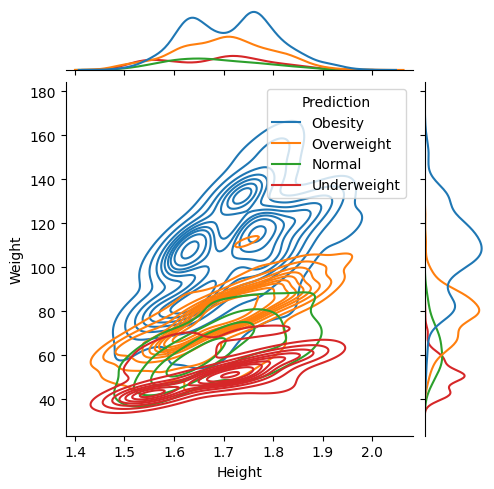

In [60]:
y_pred= knn.predict (X_train)
df_train = pd.DataFrame(scaler.inverse_transform( X_train))
df_train.columns=features
df_train["Prediction"]= y_pred


sns.jointplot(data=df_train, x="Height", y="Weight", hue= "Prediction",
              kind= "kde", height=5
              )


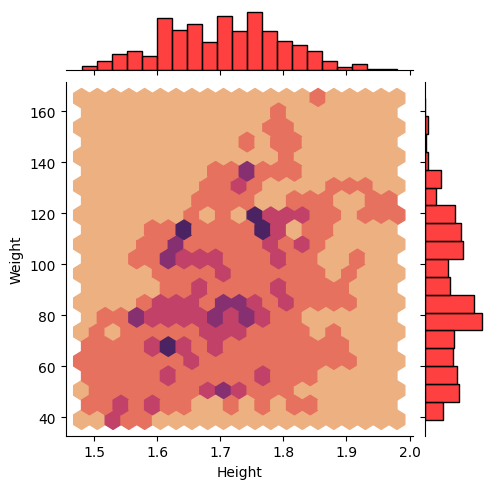

In [61]:
sns.jointplot(data=df_train, x="Height", y="Weight",
              kind= "hex", height=5, joint_kws= {"gridsize": 20, 'bins':5},
              marginal_kws= {"color": 'red'},
              cmap='flare'
              )

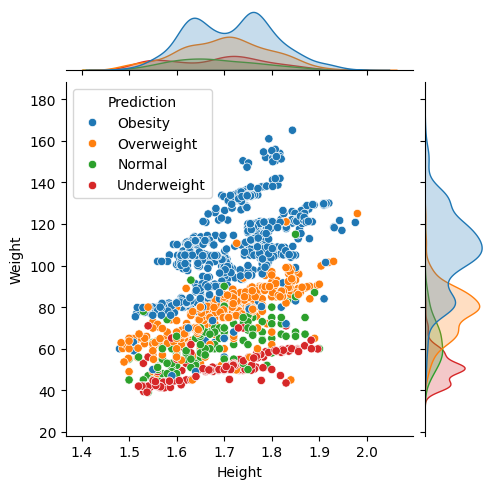

In [62]:

sns.jointplot(data=df_train, x="Height", y="Weight", hue= "Prediction",
              kind= "scatter", height=5
              )

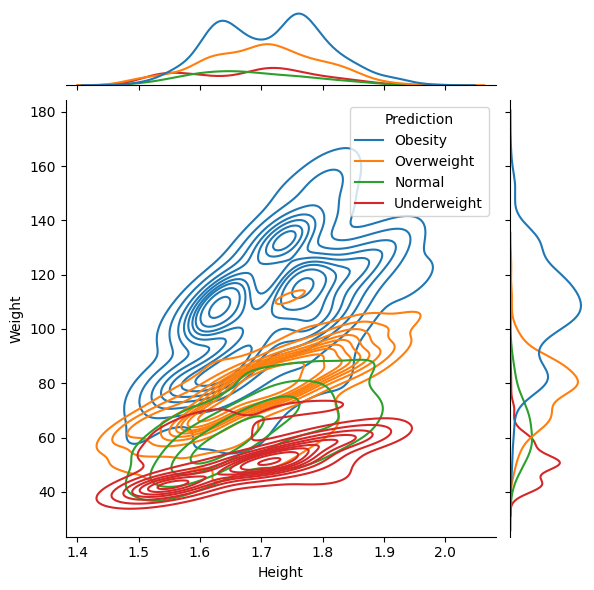

In [63]:
sns.jointplot(data=df_train, x="Height", y="Weight", hue= "Prediction",
              kind= "kde"
              )

##Testing for KNN

In [64]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.638656,0.575593,-1.275135,-0.781717,1.550181,-0.225546,2.231238,2.239155,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,1.501101,-1.501101,-0.546839,0.546839
1,0.243854,-0.833854,0.934100,1.087913,0.406104,1.145224,-1.198990,-0.537375,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
2,-1.018424,1.586972,-1.032241,1.087913,1.688710,-0.003599,1.191307,-1.071492,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,-4.698737,4.698737,-0.666178,0.666178,1.828693,-1.828693
3,-0.545070,-1.962784,-1.726177,1.087913,-2.159108,-1.634720,-1.198990,-1.071492,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
4,-0.387285,0.511288,-0.492513,-0.781717,0.406104,-0.003599,-0.003841,2.239155,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,-0.390477,-1.102237,-0.796034,-0.383233,0.406104,0.072682,1.397526,-1.071492,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
630,-0.150410,-1.102237,-1.610521,0.324055,0.406104,0.117182,0.808782,-1.071492,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,1.501101,-1.501101,-0.546839,0.546839
631,-0.067933,-1.105496,-0.846882,0.907578,0.406104,-0.737716,-1.198990,-0.618129,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
632,-1.018424,-2.715762,-1.302105,-0.781717,0.406104,-0.003599,-0.003841,2.239155,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,-4.698737,4.698737,-0.666178,0.666178,-0.546839,0.546839


In [65]:
pd.DataFrame(X_test).columns=features

In [66]:
df2 = pd.DataFrame(X_test)
df2.columns=features
df2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CAEC_No,CAEC_Yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_No,CALC_Yes,MTRANS_Automobile,MTRANS_Public_Transportation
0,-0.638656,0.575593,-1.275135,-0.781717,1.550181,-0.225546,2.231238,2.239155,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,1.501101,-1.501101,-0.546839,0.546839
1,0.243854,-0.833854,0.934100,1.087913,0.406104,1.145224,-1.198990,-0.537375,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
2,-1.018424,1.586972,-1.032241,1.087913,1.688710,-0.003599,1.191307,-1.071492,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,-4.698737,4.698737,-0.666178,0.666178,1.828693,-1.828693
3,-0.545070,-1.962784,-1.726177,1.087913,-2.159108,-1.634720,-1.198990,-1.071492,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
4,-0.387285,0.511288,-0.492513,-0.781717,0.406104,-0.003599,-0.003841,2.239155,-0.981884,0.981884,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,-0.390477,-1.102237,-0.796034,-0.383233,0.406104,0.072682,1.397526,-1.071492,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
630,-0.150410,-1.102237,-1.610521,0.324055,0.406104,0.117182,0.808782,-1.071492,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,1.501101,-1.501101,-0.546839,0.546839
631,-0.067933,-1.105496,-0.846882,0.907578,0.406104,-0.737716,-1.198990,-0.618129,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,0.212823,-0.212823,-0.666178,0.666178,-0.546839,0.546839
632,-1.018424,-2.715762,-1.302105,-0.781717,0.406104,-0.003599,-0.003841,2.239155,1.018450,-1.018450,...,-0.219684,0.219684,0.155794,-0.155794,-4.698737,4.698737,-0.666178,0.666178,-0.546839,0.546839


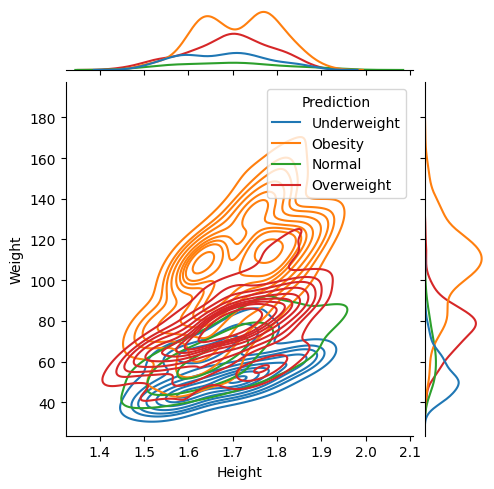

In [67]:
y_pred1= knn.predict (X_test)
df_test = pd.DataFrame(scaler.inverse_transform( X_test))
df_test.columns=features
df_test["Prediction"]= y_pred1


sns.jointplot(data=df_test, x="Height", y="Weight", hue= "Prediction",
              kind= "kde", height=5
              )


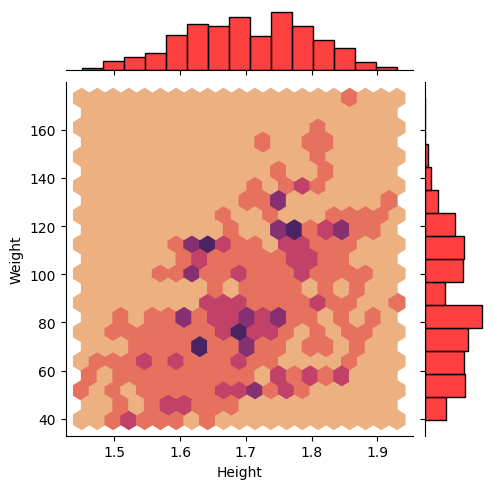

In [68]:
sns.jointplot(data=df_test, x="Height", y="Weight",
              kind= "hex", height=5, joint_kws= {"gridsize": 20, 'bins':5},
              marginal_kws= {"color": 'red'},
              cmap='flare'
              )

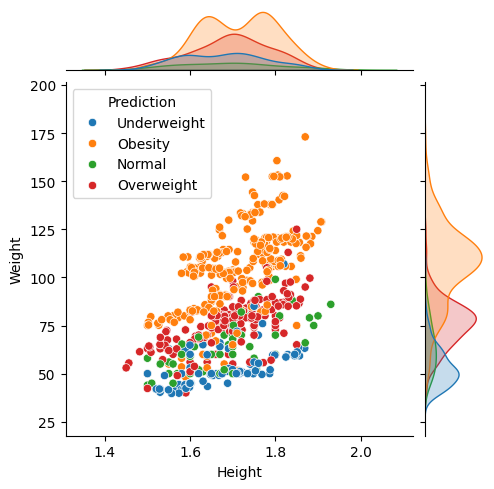

In [69]:
sns.jointplot(data=df_test, x="Height", y="Weight", hue= "Prediction",
              kind= "scatter", height=5
              )

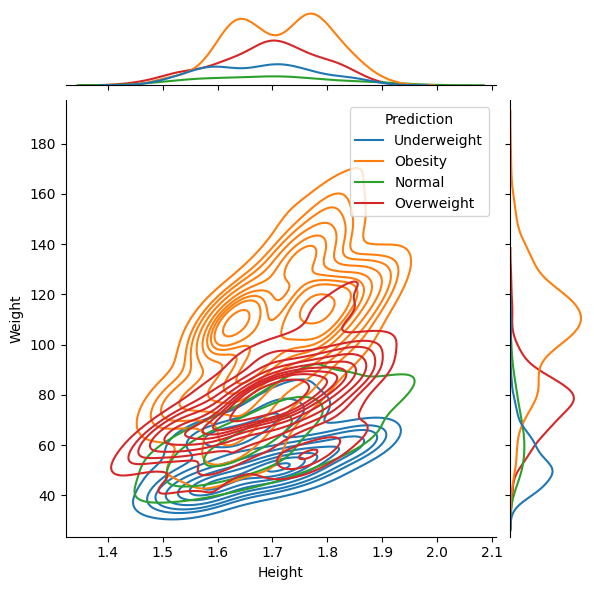

In [70]:
sns.jointplot(data=df_test, x="Height", y="Weight", hue= "Prediction",
              kind= "kde"
              )

##TUE and FAF

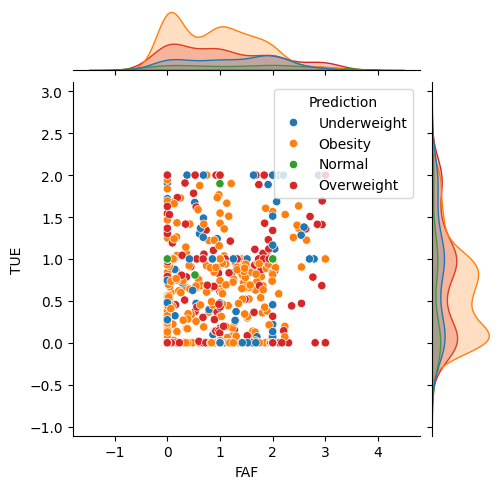

In [71]:
sns.jointplot(data=df_test, x="FAF", y="TUE", hue= "Prediction",
              kind= "scatter", height=5)

              #How do I remove the white spaces??
              #This model has 0 correlation :(


#PCA Experiment

In [72]:
X=df[features]
y=df[target]

In [73]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)

##Standardisation and PCA

In [74]:
scaler= StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [75]:
pca= PCA().fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)

###KNN

In [76]:
knn= BaggingClassifier(estimator= KNeighborsClassifier(n_neighbors= 4),n_estimators=50)
knn.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=4),
                  n_estimators=50)

In [77]:
score_train_knn_pca= knn.score(X_train, y_train)
score_test_knn_pca= knn.score(X_test, y_test)


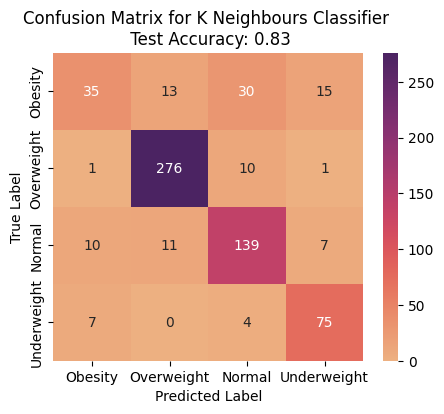

              precision    recall  f1-score   support

      Normal       0.66      0.38      0.48        93
     Obesity       0.92      0.96      0.94       288
  Overweight       0.76      0.83      0.79       167
 Underweight       0.77      0.87      0.82        86

    accuracy                           0.83       634
   macro avg       0.78      0.76      0.76       634
weighted avg       0.82      0.83      0.82       634



In [78]:
confusion_classification_report(knn, "K Neighbours Classifier", score_test_knn_pca)

###Gradient Booosting w/ PCA

In [79]:
gb= GradientBoostingClassifier().fit(X_train, y_train)
score_train_gb_pca= gb.score(X_train, y_train)
score_test_gb_pca= gb.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


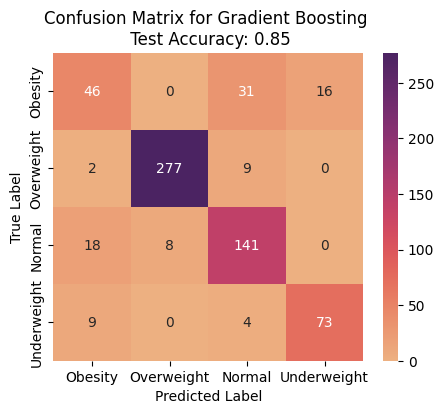

              precision    recall  f1-score   support

      Normal       0.61      0.49      0.55        93
     Obesity       0.97      0.96      0.97       288
  Overweight       0.76      0.84      0.80       167
 Underweight       0.82      0.85      0.83        86

    accuracy                           0.85       634
   macro avg       0.79      0.79      0.79       634
weighted avg       0.84      0.85      0.84       634



In [80]:
confusion_classification_report(gb, "Gradient Boosting", score_test_gb_pca)

###Logistic Regression

In [81]:
lg= LogisticRegression().fit(X_train, y_train)
score_train_lg_pca= lg.score(X_train, y_train)
score_test_lg_pca= lg.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


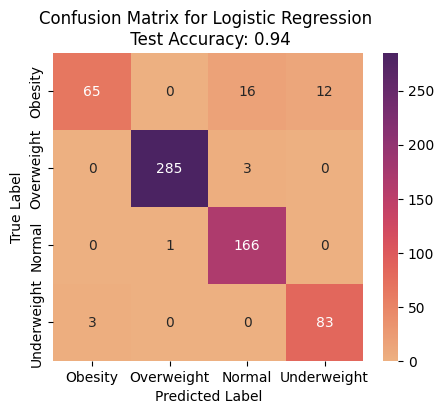

              precision    recall  f1-score   support

      Normal       0.96      0.70      0.81        93
     Obesity       1.00      0.99      0.99       288
  Overweight       0.90      0.99      0.94       167
 Underweight       0.87      0.97      0.92        86

    accuracy                           0.94       634
   macro avg       0.93      0.91      0.92       634
weighted avg       0.95      0.94      0.94       634



In [82]:
confusion_classification_report(lg, "Logistic Regression", score_test_lg_pca)

###Extra Trees Classifier

In [83]:
et= ExtraTreesClassifier().fit(X_train, y_train)
score_train_et_pca= et.score(X_train, y_train)
score_test_et_pca= et.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


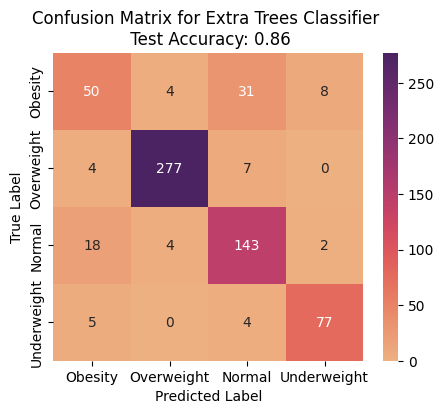

              precision    recall  f1-score   support

      Normal       0.65      0.54      0.59        93
     Obesity       0.97      0.96      0.97       288
  Overweight       0.77      0.86      0.81       167
 Underweight       0.89      0.90      0.89        86

    accuracy                           0.86       634
   macro avg       0.82      0.81      0.81       634
weighted avg       0.86      0.86      0.86       634



In [84]:
confusion_classification_report(et, "Extra Trees Classifier", score_test_et_pca)

#SMOTE Experiment

In [85]:
X=df[features]
y=df[target]

In [86]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)

##Standardisation and PCA

In [87]:
scaler= StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [88]:
pca= PCA().fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)

##Summary

In [89]:
train_scores= [score_train, score_train_pca]
test_scores= [score_test, score_test_pca]
experiment= ["Without PCA", "With PCA"]
dict_scores= {"Train Score": train_scores, "Test Score": test_scores}
pd.DataFrame(dict_scores, index=experiment).sort_values("Test Score", ascending=False)

NameError: name 'score_train' is not defined